In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

main_data = pd.read_csv( "C://Tsenguun/datasets/Lending club/LoanStats3a_securev1.csv", delimiter="," )

main_data.head() 

C:\Users\Tsenguunn\AppData\Local\Temp\ipykernel_17000\2163411677.py:3: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  main_data = pd.read_csv( "C://Tsenguun/datasets/Lending club/LoanStats3a_securev1.csv", delimiter="," )


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501  1296599.0     5000.0       5000.0           4975.0   36 months   
1  1077430  1314167.0     2500.0       2500.0           2500.0   60 months   
2  1077175  1313524.0     2400.0       2400.0           2400.0   36 months   
3  1076863  1277178.0    10000.0      10000.0          10000.0   36 months   
4  1075358  1311748.0     3000.0       3000.0           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  11-Dec   Fully Paid   
1           RENT     30000.0     Source Verified  11-Dec  Charged Off   
2           RENT     12252.0        Not Verified  11-Dec   Fully Paid   
3           RENT     49200.0     Source Verified  11-Dec   Fully Paid   
4           RENT     80000.0     Source Verified  11-Dec      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  fico_range_low  fico_range_high  inq_last_6mths  \
0           Jan-85           735.0            739.0             1.0   
1           Apr-99           740.0            744.0             5.0   
2           01-Nov           735.0            739.0             2.0   
3           Feb-96           690.0            694.0             1.0   
4           Jan-96           695.0            699.0             0.0   

   mths_since_last_delinq  mths_since_last_record  open_acc  pub_rec  \
0                     NaN                     NaN       3.0      0.0   
1                     NaN                     NaN       3.0      0.0   
2                     NaN                     NaN       2.0      0.0   
3                    35.0                     NaN      10.0      0.0   
4                    38.0                     NaN      15.0      0.0   

   revol_bal revol_util  total_acc initial_list_status  out_prncp  \
0    13648.0     83.70%        9.0                   f       0.00   
1     1687.0      9.40%        4.0                   f       0.00   
2     2956.0     98.50%       10.0                   f       0.00   
3     5598.0        21%       37.0                   f       0.00   
4    27783.0     53.90%       38.0                   f     205.78   

   out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0           0.00   5863.155187       

In [3]:
data_2 = main_data[ [ 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', \
                     'emp_title', 'emp_length', 'home_ownership', \
                     'annual_inc', 'verification_status', 'loan_status', \
                     'zip_code', 'addr_state', 'delinq_2yrs', 'mths_since_last_delinq', \
                     'mths_since_last_record', 'total_pymnt', 'recoveries', 'last_pymnt_d', \
                     'last_pymnt_amnt', 'acc_now_delinq', 'chargeoff_within_12_mths', \
                     'delinq_amnt' ] ]

In [4]:
data_2 = data_2[ data_2['loan_status'].isin([ 'Charged Off', 'Fully Paid', 'Does not meet the credit policy. Status:Charged Off', 'Does not meet the credit policy. Status:Fully Paid' ]) ]
data_2.reset_index(drop=True, inplace=True)

data_2['y_hat'] = 0
data_2.loc[ data_2['loan_status'].isin([ 'Charged Off', 'Does not meet the credit policy. Status:Charged Off']), 'y_hat' ] = 1


In [5]:
data_3 = data_2[['loan_amnt', 'term', 'int_rate',
       'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'y_hat']]

data_3.dropna(inplace=True)

C:\Users\Tsenguunn\AppData\Local\Temp\ipykernel_17000\3663650484.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3.dropna(inplace=True)


In [6]:
data_3.head() 

loan_amnt        term int_rate emp_length home_ownership  annual_inc  \
0     5000.0   36 months   10.65%  10+ years           RENT     24000.0   
1     2500.0   60 months   15.27%   < 1 year           RENT     30000.0   
2     2400.0   36 months   15.96%  10+ years           RENT     12252.0   
3    10000.0   36 months   13.49%  10+ years           RENT     49200.0   
4     5000.0   36 months    7.90%    3 years           RENT     36000.0   

  verification_status  y_hat  
0            Verified      0  
1     Source Verified      1  
2        Not Verified      0  
3     Source Verified      0  
4     Source Verified      0

In [7]:
data_3['int_rate_num'] = data_3.apply( lambda x: float( x['int_rate'].replace("%", "") ) / 100, axis=1 )
data_3.drop(columns=['int_rate'], inplace=True)

data_3['y_hat'] = data_3['y_hat'].astype(float)

data_4 = data_3.sample(frac=1, random_state=1).reset_index(drop=True)


C:\Users\Tsenguunn\AppData\Local\Temp\ipykernel_17000\3956499298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3['int_rate_num'] = data_3.apply( lambda x: float( x['int_rate'].replace("%", "") ) / 100, axis=1 )
C:\Users\Tsenguunn\AppData\Local\Temp\ipykernel_17000\3956499298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3.drop(columns=['int_rate'], inplace=True)
C:\Users\Tsenguunn\AppData\Local\Temp\ipykernel_17000\3956499298.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [8]:
data_4 = pd.get_dummies(data_3, columns=['term'], prefix='term', dtype=float)
data_4 = pd.get_dummies(data_4, columns=['emp_length'], prefix='emp_length', dtype=float)
data_4 = pd.get_dummies(data_4, columns=['home_ownership'], prefix='home_ownership', dtype=float)
data_4 = pd.get_dummies(data_4, columns=['verification_status'], prefix='verification_status', dtype=float)

data_4.head()

loan_amnt  annual_inc  y_hat  int_rate_num  term_ 36 months  \
0     5000.0     24000.0    0.0        0.1065              1.0   
1     2500.0     30000.0    1.0        0.1527              0.0   
2     2400.0     12252.0    0.0        0.1596              1.0   
3    10000.0     49200.0    0.0        0.1349              1.0   
4     5000.0     36000.0    0.0        0.0790              1.0   

   term_ 60 months  emp_length_1 year  emp_length_10+ years  \
0              0.0                0.0                   1.0   
1              1.0                0.0                   0.0   
2              0.0                0.0                   1.0   
3              0.0                0.0                   1.0   
4              0.0                0.0                   0.0   

   emp_length_2 years  emp_length_3 years  emp_length_4 years  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 1.0                 0.0   

   emp_length_5 years  emp_length_6 years  emp_length_7 years  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   emp_length_8 years  emp_length_9 years  emp_length_< 1 year  \
0                 0.0                 0.0                  0.0   
1                 0.0                 0.0                  1.0   
2                 0.0                 0.0                  0.0   
3                 0.0                 0.0                  0.0   
4                 0.0                 0.0                  0.0   

   home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OTHER  \
0                      0.0                  0.0                   0.0   
1                      0.0                  0.0                   0.0   
2                      0.0                  0.0                   0.0   
3                      0.0                  0.0                   0.0   
4                      0.0                  0.0                   0.0   

   home_ownership_OWN  home_ownership_RENT  verification_status_Not Verified  \
0                 0.0                  1.0                               0.0   
1                 0.0                  1.0                               0.0   
2                 0.0                  1.0                               1.0   
3                 0.0                  1.0                               0.0   
4                 0.0                  1.0                               0.0   

   verification_status_Source Verified  verification_status_Verified  
0                                  0.0                           1.0  
1                                  1.0                           0.0  
2                                  0.0                           0.0  
3                                  1.0                           0.0  
4                                  1.0                           0.0

In [9]:
data_4 = data_4.rename( columns={ 'emp_length_< 1 year': 'emp_length_below_1_year' } )

data_4.head() 

loan_amnt  annual_inc  y_hat  int_rate_num  term_ 36 months  \
0     5000.0     24000.0    0.0        0.1065              1.0   
1     2500.0     30000.0    1.0        0.1527              0.0   
2     2400.0     12252.0    0.0        0.1596              1.0   
3    10000.0     49200.0    0.0        0.1349              1.0   
4     5000.0     36000.0    0.0        0.0790              1.0   

   term_ 60 months  emp_length_1 year  emp_length_10+ years  \
0              0.0                0.0                   1.0   
1              1.0                0.0                   0.0   
2              0.0                0.0                   1.0   
3              0.0                0.0                   1.0   
4              0.0                0.0                   0.0   

   emp_length_2 years  emp_length_3 years  emp_length_4 years  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 1.0                 0.0   

   emp_length_5 years  emp_length_6 years  emp_length_7 years  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   emp_length_8 years  emp_length_9 years  emp_length_below_1_year  \
0                 0.0                 0.0                      0.0   
1                 0.0                 0.0                      1.0   
2                 0.0                 0.0                      0.0   
3                 0.0                 0.0                      0.0   
4                 0.0                 0.0                      0.0   

   home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OTHER  \
0                      0.0                  0.0                   0.0   
1                      0.0                  0.0                   0.0   
2                      0.0                  0.0                   0.0   
3                      0.0                  0.0                   0.0   
4                      0.0                  0.0                   0.0   

   home_ownership_OWN  home_ownership_RENT  verification_status_Not Verified  \
0                 0.0                  1.0                               0.0   
1                 0.0                  1.0                               0.0   
2                 0.0                  1.0                               1.0   
3                 0.0                  1.0                               0.0   
4                 0.0                  1.0                               0.0   

   verification_status_Source Verified  verification_status_Verified  
0                                  0.0                           1.0  
1                                  1.0                           0.0  
2                                  0.0                           0.0  
3                                  1.0                           0.0  
4                                  1.0                           0.0

In [10]:
data_len = data_4.shape[0]
val_len = np.int(np.floor(data_len*0.30))
train_len = data_len - val_len

print(f"val_len: {val_len}, train_len: {train_len}")

val_len: 12291, train_len: 28679


C:\Users\Tsenguunn\AppData\Local\Temp\ipykernel_17000\3225525871.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  val_len = np.int(np.floor(data_len*0.30))


In [11]:
x_cols=[ 'loan_amnt', 'annual_inc', 'term_ 36 months',
       'term_ 60 months', 'int_rate_num', 'emp_length_1 year',
       'emp_length_10+ years', 'emp_length_2 years', 'emp_length_3 years',
       'emp_length_4 years', 'emp_length_5 years', 'emp_length_6 years',
       'emp_length_7 years', 'emp_length_8 years', 'emp_length_9 years',
       'emp_length_below_1_year', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified' ]

target_col=['y_hat']

In [12]:
tr_dat_x = data_4[x_cols].iloc[0:train_len, : ]
tr_dat_y = data_4[target_col].iloc[0:train_len, : ]

val_dat_x = data_4[x_cols].iloc[train_len:train_len+val_len, : ]
val_dat_y = data_4[target_col].iloc[train_len:train_len+val_len, : ]

tr_dat_x.head()

loan_amnt  annual_inc  term_ 36 months  term_ 60 months  int_rate_num  \
0     5000.0     24000.0              1.0              0.0        0.1065   
1     2500.0     30000.0              0.0              1.0        0.1527   
2     2400.0     12252.0              1.0              0.0        0.1596   
3    10000.0     49200.0              1.0              0.0        0.1349   
4     5000.0     36000.0              1.0              0.0        0.0790   

   emp_length_1 year  emp_length_10+ years  emp_length_2 years  \
0                0.0                   1.0                 0.0   
1                0.0                   0.0                 0.0   
2                0.0                   1.0                 0.0   
3                0.0                   1.0                 0.0   
4                0.0                   0.0                 0.0   

   emp_length_3 years  emp_length_4 years  emp_length_5 years  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 1.0                 0.0                 0.0   

   emp_length_6 years  emp_length_7 years  emp_length_8 years  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   emp_length_9 years  emp_length_below_1_year  home_ownership_MORTGAGE  \
0                 0.0                      0.0                      0.0   
1                 0.0                      1.0                      0.0   
2                 0.0                      0.0                      0.0   
3                 0.0                      0.0                      0.0   
4                 0.0                      0.0                      0.0   

   home_ownership_NONE  home_ownership_OTHER  home_ownership_OWN  \
0                  0.0                   0.0                 0.0   
1                  0.0                   0.0                 0.0   
2                  0.0                   0.0                 0.0   
3                  0.0                   0.0                 0.0   
4                  0.0                   0.0                 0.0   

   home_ownership_RENT  verification_status_Not Verified  \
0                  1.0                               0.0   
1                  1.0                               0.0   
2                  1.0                               1.0   
3                  1.0                               0.0   
4                  1.0                               0.0   

   verification_status_Source Verified  verification_status_Verified  
0                                  0.0                           1.0  
1                                  1.0                           0.0  
2                                  0.0                           0.0  
3                                  1.0                           0.0  
4                                  1.0                           0.0

In [13]:
clf_RF = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=8, random_state=3).fit( tr_dat_x, tr_dat_y )
val_pred_rf = clf_RF.predict( val_dat_x )

all_predictors_accuracy = accuracy_score( val_pred_rf, val_dat_y )
all_predictors_accuracy

C:\Users\Tsenguunn\AppData\Local\Temp\ipykernel_17000\2750266207.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_RF = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=8, random_state=3).fit( tr_dat_x, tr_dat_y )


0.841835489382475

In [14]:
# Initialize a list of results
results = []
# Iterate through each predictor
for predictor in x_cols:
    
    # Create a copy of X_test
    val_dat_x_copy = val_dat_x.copy()
    
    # Scramble the values of the given predictor
    val_dat_x_copy[predictor] = val_dat_x[predictor].sample(frac=1, random_state=1).values
    
    # Calculate the new RMSE
    predictor_accuracy = accuracy_score( clf_RF.predict( val_dat_x_copy ), val_dat_y )
    #print(predictor)
    #print(all_predictors_accuracy - predictor_accuracy)
    # Append the increase in MSE to the list of results 
    results.append({'predictor': predictor,
                    'permutation FI score': predictor_accuracy - all_predictors_accuracy })
    #results.append({predictor: all_predictors_accuracy - predictor_accuracy})

In [15]:
results = sorted(results, key=lambda i: i['permutation FI score'])
results

[{'predictor': 'loan_amnt', 'permutation FI score': 0.0},
 {'predictor': 'annual_inc', 'permutation FI score': 0.0},
 {'predictor': 'term_ 36 months', 'permutation FI score': 0.0},
 {'predictor': 'term_ 60 months', 'permutation FI score': 0.0},
 {'predictor': 'int_rate_num', 'permutation FI score': 0.0},
 {'predictor': 'emp_length_1 year', 'permutation FI score': 0.0},
 {'predictor': 'emp_length_10+ years', 'permutation FI score': 0.0},
 {'predictor': 'emp_length_2 years', 'permutation FI score': 0.0},
 {'predictor': 'emp_length_3 years', 'permutation FI score': 0.0},
 {'predictor': 'emp_length_4 years', 'permutation FI score': 0.0},
 {'predictor': 'emp_length_5 years', 'permutation FI score': 0.0},
 {'predictor': 'emp_length_6 years', 'permutation FI score': 0.0},
 {'predictor': 'emp_length_7 years', 'permutation FI score': 0.0},
 {'predictor': 'emp_length_8 years', 'permutation FI score': 0.0},
 {'predictor': 'emp_length_9 years', 'permutation FI score': 0.0},
 {'predictor': 'emp_len

In [16]:
df = pd.DataFrame( columns=['feature_name', 'feature_importance_value'] )
for i in range( len(x_cols) ):
    
    df.loc[i, 'feature_name'] = x_cols[i]
    df.loc[i, 'feature_importance_value'] = clf_RF.feature_importances_[i]
    
df.sort_values( 'feature_importance_value', ascending=False )

feature_name feature_importance_value
4                          int_rate_num                 0.368818
1                            annual_inc                 0.161173
3                       term_ 60 months                 0.133696
2                       term_ 36 months                 0.116635
0                             loan_amnt                 0.102236
21     verification_status_Not Verified                 0.012852
20                  home_ownership_RENT                 0.012547
16              home_ownership_MORTGAGE                  0.01216
23         verification_status_Verified                 0.011056
22  verification_status_Source Verified                 0.008898
6                  emp_length_10+ years                 0.007511
19                   home_ownership_OWN                 0.007183
12                   emp_length_7 years                 0.005081
8                    emp_length_3 years                 0.004621
13                   emp_length_8 years                 0.004524
15              emp_length_below_1_year                 0.004515
9                    emp_length_4 years                 0.004488
10                   emp_length_5 years                 0.004457
7                    emp_length_2 years                 0.004421
11                   emp_length_6 years                 0.004305
5                     emp_length_1 year                 0.004269
14                   emp_length_9 years                 0.004067
18                 home_ownership_OTHER                 0.000489
17                  home_ownership_NONE                      0.0

In [17]:
clf_logistic = LogisticRegression(random_state=3).fit( tr_dat_x, tr_dat_y )

val_pred_log = clf_logistic.predict( val_dat_x )

all_predictors_accuracy_log = accuracy_score( val_pred_log, val_dat_y )
all_predictors_accuracy_log

C:\Users\Tsenguunn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.841835489382475

In [18]:
# Initialize a list of results
results_log = []
# Iterate through each predictor
for predictor in x_cols:
    
    # Create a copy of X_test
    val_dat_x_copy = val_dat_x.copy()
    
    # Scramble the values of the given predictor
    val_dat_x_copy[predictor] = val_dat_x[predictor].sample(frac=1).values
    
    # Calculate the new RMSE
    predictor_accuracy = accuracy_score( clf_logistic.predict( val_dat_x_copy ), val_dat_y )

    # Append the increase in MSE to the list of results 
    results_log.append({'predictor': predictor,
                    'permutation FI score': predictor_accuracy - all_predictors_accuracy_log })


In [19]:
results_log = sorted(results_log, key=lambda i: i['permutation FI score'])
#results_log

In [20]:
model = xgb.XGBClassifier(num_parallel_tree=4, max_depth=12, n_estimators=150, learning_rate=0.1)

model.fit( tr_dat_x, tr_dat_y )

val_pred_xgb = model.predict( val_dat_x )
all_predictors_accuracy_xgb = accuracy_score( val_pred_xgb, val_dat_y )
all_predictors_accuracy_xgb

0.8380929135139533

In [21]:
# Initialize a list of results
results_xgb = []
# Iterate through each predictor
for predictor in x_cols:
    
    # Create a copy of X_test
    val_dat_x_copy = val_dat_x.copy()
    
    # Scramble the values of the given predictor
    val_dat_x_copy[predictor] = val_dat_x[predictor].sample(frac=1, random_state=1).values
    
    # Calculate the new RMSE
    predictor_accuracy = accuracy_score( model.predict( val_dat_x_copy ), val_dat_y )

    # Append the increase in MSE to the list of results 
    results_xgb.append({'predictor': predictor,
                    'permutation FI score': predictor_accuracy - all_predictors_accuracy_xgb })


In [22]:
results_xgb = sorted(results_xgb, key=lambda i: i['permutation FI score'])
results_xgb

[{'predictor': 'annual_inc', 'permutation FI score': -0.00512570173297533},
 {'predictor': 'int_rate_num', 'permutation FI score': -0.0022780896591001465},
 {'predictor': 'emp_length_10+ years',
  'permutation FI score': -0.0009763241396143485},
 {'predictor': 'verification_status_Not Verified',
  'permutation FI score': -0.00048816206980717425},
 {'predictor': 'home_ownership_MORTGAGE',
  'permutation FI score': -0.0004068017248393119},
 {'predictor': 'verification_status_Source Verified',
  'permutation FI score': -0.0004068017248393119},
 {'predictor': 'emp_length_5 years',
  'permutation FI score': -0.00016272068993572475},
 {'predictor': 'emp_length_2 years',
  'permutation FI score': -8.136034496786237e-05},
 {'predictor': 'loan_amnt', 'permutation FI score': 0.0},
 {'predictor': 'term_ 36 months', 'permutation FI score': 0.0},
 {'predictor': 'term_ 60 months', 'permutation FI score': 0.0},
 {'predictor': 'emp_length_8 years', 'permutation FI score': 0.0},
 {'predictor': 'home_ow

In [23]:
df_xgb = pd.DataFrame( columns=['feature_name', 'feature_importance_value'] )
for i in range( len(x_cols) ):
    
    df_xgb.loc[i, 'feature_name'] = x_cols[i]
    df_xgb.loc[i, 'feature_importance_value'] = model.feature_importances_[i]
    
df_xgb.sort_values( 'feature_importance_value', ascending=False )

feature_name feature_importance_value
2                       term_ 36 months                 0.167209
4                          int_rate_num                 0.057435
12                   emp_length_7 years                 0.047315
8                    emp_length_3 years                 0.044642
1                            annual_inc                 0.043671
19                   home_ownership_OWN                 0.041883
7                    emp_length_2 years                 0.041821
11                   emp_length_6 years                 0.041664
0                             loan_amnt                 0.041564
22  verification_status_Source Verified                 0.041423
10                   emp_length_5 years                 0.040701
9                    emp_length_4 years                 0.040523
23         verification_status_Verified                 0.040466
15              emp_length_below_1_year                 0.039897
5                     emp_length_1 year                 0.039739
16              home_ownership_MORTGAGE                 0.039707
14                   emp_length_9 years                 0.039254
20                  home_ownership_RENT                 0.038057
21     verification_status_Not Verified                 0.037836
6                  emp_length_10+ years                 0.037629
13                   emp_length_8 years                 0.037565
17                  home_ownership_NONE                      0.0
18                 home_ownership_OTHER                      0.0
3                       term_ 60 months                      0.0

In [24]:
x_cols_2=[ 'loan_amnt', 'annual_inc', 'term_ 36 months',
       'term_ 60 months', 'int_rate_num', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified' ]

clf_RF = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=10, random_state=3).fit( tr_dat_x[ x_cols_2 ], tr_dat_y )
val_pred_rf = clf_RF.predict( val_dat_x[ x_cols_2 ] )

all_predictors_accuracy = accuracy_score( val_pred_rf, val_dat_y )
all_predictors_accuracy

C:\Users\Tsenguunn\AppData\Local\Temp\ipykernel_17000\969585685.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_RF = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=10, random_state=3).fit( tr_dat_x[ x_cols_2 ], tr_dat_y )


0.8416727686925393

In [25]:
x_cols_3=[ 'loan_amnt', 'annual_inc', 'term_ 36 months',
       'term_ 60 months', 'int_rate_num', 'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT' ]

clf_RF = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=8, \
                                random_state=3).fit( tr_dat_x[ x_cols_3 ], tr_dat_y )
val_pred_rf = clf_RF.predict( val_dat_x[ x_cols_3 ] )

all_predictors_accuracy = accuracy_score( val_pred_rf, val_dat_y )
all_predictors_accuracy

C:\Users\Tsenguunn\AppData\Local\Temp\ipykernel_17000\2582560293.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_RF = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=8, \


0.8417541290375071

In [26]:
x_cols_4=[ 'loan_amnt', 'annual_inc', 'term_ 36 months',
       'term_ 60 months', 'int_rate_num' ]

clf_RF = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=5, \
                                random_state=3).fit( tr_dat_x[ x_cols_4 ], tr_dat_y )
val_pred_rf = clf_RF.predict( val_dat_x[ x_cols_4 ] )

all_predictors_accuracy = accuracy_score( val_pred_rf, val_dat_y )
all_predictors_accuracy

C:\Users\Tsenguunn\AppData\Local\Temp\ipykernel_17000\879954989.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_RF = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=5, \


0.841835489382475

In [27]:
df = pd.DataFrame( columns=['feature_name', 'feature_importance_value'] )
for i in range( len(x_cols_4) ):
    
    df.loc[i, 'feature_name'] = x_cols_4[i]
    df.loc[i, 'feature_importance_value'] = clf_RF.feature_importances_[i]
    
df.sort_values( 'feature_importance_value', ascending=False )

feature_name feature_importance_value
4     int_rate_num                 0.447901
3  term_ 60 months                 0.191701
2  term_ 36 months                 0.155644
1       annual_inc                 0.152744
0        loan_amnt                 0.052009

In [28]:
model = xgb.XGBClassifier(num_parallel_tree=4, max_depth=3, n_estimators=30, learning_rate=0.02)

model.fit( tr_dat_x[x_cols_4], tr_dat_y )

val_pred_xgb = model.predict( val_dat_x[ x_cols_4 ] )
all_predictors_accuracy_xgb = accuracy_score( val_pred_xgb, val_dat_y )
all_predictors_accuracy_xgb

0.841835489382475

In [29]:
df_xgb = pd.DataFrame( columns=['feature_name', 'feature_importance_value'] )
for i in range( len(x_cols_4) ):
    
    df_xgb.loc[i, 'feature_name'] = x_cols_4[i]
    df_xgb.loc[i, 'feature_importance_value'] = model.feature_importances_[i]
    
df_xgb.sort_values( 'feature_importance_value', ascending=False )

feature_name feature_importance_value
4     int_rate_num                 0.642119
2  term_ 36 months                  0.27658
1       annual_inc                 0.081301
0        loan_amnt                      0.0
3  term_ 60 months                      0.0

In [30]:
data_3 = data_3.rename( columns={ 'y_hat': 'defaulted' } )
data_3.head() 

loan_amnt        term emp_length home_ownership  annual_inc  \
0     5000.0   36 months  10+ years           RENT     24000.0   
1     2500.0   60 months   < 1 year           RENT     30000.0   
2     2400.0   36 months  10+ years           RENT     12252.0   
3    10000.0   36 months  10+ years           RENT     49200.0   
4     5000.0   36 months    3 years           RENT     36000.0   

  verification_status  defaulted  int_rate_num  
0            Verified        0.0        0.1065  
1     Source Verified        1.0        0.1527  
2        Not Verified        0.0        0.1596  
3     Source Verified        0.0        0.1349  
4     Source Verified        0.0        0.0790

In [31]:
#pip install pandas-profiling

In [32]:
from pandas_profiling import ProfileReport

In [33]:
profile = ProfileReport(data_3, title="Loan Application Data Profiling Report")

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [34]:
data_4 = data_4.rename( columns={ 'y_hat': 'defaulted' } )
data_4.head() 

loan_amnt  annual_inc  defaulted  int_rate_num  term_ 36 months  \
0     5000.0     24000.0        0.0        0.1065              1.0   
1     2500.0     30000.0        1.0        0.1527              0.0   
2     2400.0     12252.0        0.0        0.1596              1.0   
3    10000.0     49200.0        0.0        0.1349              1.0   
4     5000.0     36000.0        0.0        0.0790              1.0   

   term_ 60 months  emp_length_1 year  emp_length_10+ years  \
0              0.0                0.0                   1.0   
1              1.0                0.0                   0.0   
2              0.0                0.0                   1.0   
3              0.0                0.0                   1.0   
4              0.0                0.0                   0.0   

   emp_length_2 years  emp_length_3 years  emp_length_4 years  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 1.0                 0.0   

   emp_length_5 years  emp_length_6 years  emp_length_7 years  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   emp_length_8 years  emp_length_9 years  emp_length_below_1_year  \
0                 0.0                 0.0                      0.0   
1                 0.0                 0.0                      1.0   
2                 0.0                 0.0                      0.0   
3                 0.0                 0.0                      0.0   
4                 0.0                 0.0                      0.0   

   home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OTHER  \
0                      0.0                  0.0                   0.0   
1                      0.0                  0.0                   0.0   
2                      0.0                  0.0                   0.0   
3                      0.0                  0.0                   0.0   
4                      0.0                  0.0                   0.0   

   home_ownership_OWN  home_ownership_RENT  verification_status_Not Verified  \
0                 0.0                  1.0                               0.0   
1                 0.0                  1.0                               0.0   
2                 0.0                  1.0                               1.0   
3                 0.0                  1.0                               0.0   
4                 0.0                  1.0                               0.0   

   verification_status_Source Verified  verification_status_Verified  
0                                  0.0                           1.0  
1                                  1.0                           0.0  
2                                  0.0                           0.0  
3                                  1.0                           0.0  
4                                  1.0                           0.0

In [35]:
profile_2 = ProfileReport(data_4, title="Loan Application Data Profiling Report")

profile_2.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [36]:
data_4[x_cols_4 + ['defaulted']].corr()

loan_amnt  annual_inc  term_ 36 months  term_ 60 months  \
loan_amnt         1.000000    0.273346        -0.346750         0.346750   
annual_inc        0.273346    1.000000        -0.042204         0.042204   
term_ 36 months  -0.346750   -0.042204         1.000000        -1.000000   
term_ 60 months   0.346750    0.042204        -1.000000         1.000000   
int_rate_num      0.285714    0.050059        -0.422919         0.422919   
defaulted         0.049710   -0.035877        -0.143630         0.143630   

                 int_rate_num  defaulted  
loan_amnt            0.285714   0.049710  
annual_inc           0.050059  -0.035877  
term_ 36 months     -0.422919  -0.143630  
term_ 60 months      0.422919   0.143630  
int_rate_num         1.000000   0.207912  
defaulted            0.207912   1.000000

In [37]:
data_4[x_cols_3 + ['defaulted']].corr()

loan_amnt  annual_inc  term_ 36 months  \
loan_amnt                 1.000000    0.273346        -0.346750   
annual_inc                0.273346    1.000000        -0.042204   
term_ 36 months          -0.346750   -0.042204         1.000000   
term_ 60 months           0.346750    0.042204        -1.000000   
int_rate_num              0.285714    0.050059        -0.422919   
home_ownership_MORTGAGE   0.177472    0.202797        -0.105031   
home_ownership_NONE      -0.004199    0.001353         0.005717   
home_ownership_OTHER     -0.010482   -0.001321         0.032411   
home_ownership_OWN       -0.030643   -0.039426         0.010009   
home_ownership_RENT      -0.159278   -0.181051         0.095428   
defaulted                 0.049710   -0.035877        -0.143630   

                         term_ 60 months  int_rate_num  \
loan_amnt                       0.346750      0.285714   
annual_inc                      0.042204      0.050059   
term_ 36 months                -1.000000     -0.422919   
term_ 60 months                 1.000000      0.422919   
int_rate_num                    0.422919      1.000000   
home_ownership_MORTGAGE         0.105031     -0.055833   
home_ownership_NONE            -0.005717     -0.004628   
home_ownership_OTHER           -0.032411      0.009529   
home_ownership_OWN             -0.010009     -0.010807   
home_ownership_RENT            -0.095428      0.060192   
defaulted                       0.143630      0.207912   

                         home_ownership_MORTGAGE  home_ownership_NONE  \
loan_amnt                               0.177472            -0.004199   
annual_inc                              0.202797             0.001353   
term_ 36 months                        -0.105031             0.005717   
term_ 60 months                         0.105031            -0.005717   
int_rate_num                           -0.055833            -0.004628   
home_ownership_MORTGAGE                 1.000000            -0.008853   
home_ownership_NONE                    -0.008853             1.000000   
home_ownership_OTHER                   -0.051703            -0.000570   
home_ownership_OWN                     -0.252366            -0.002784   
home_ownership_RENT                    -0.856982            -0.009452   
defaulted                              -0.020136             0.002745   

                         home_ownership_OTHER  home_ownership_OWN  \
loan_amnt                           -0.010482           -0.030643   
annual_inc                          -0.001321           -0.039426   
term_ 36 months                      0.032411            0.010009   
term_ 60 months                     -0.032411           -0.010009   
int_rate_num                         0.009529           -0.010807   
home_ownership_MORTGAGE             -0.051703           -0.252366   
home_ownership_NONE                 -0.000570           -0.002784   
home_ownership_OTHER                 1.000000           -0.016257   
home_ownership_OWN                  -0.016257            1.000000   
home_ownership_RENT                 -0.055204           -0.269458   
defaulted                            0.010102           -0.000961   

                         home_ownership_RENT  defaulted  
loan_amnt                          -0.159278   0.049710  
annual_inc                         -0.181051  -0.035877  
term_ 36 months                     0.095428  -0.143630  
term_ 60 months                    -0.095428   0.143630  
int_rate_num                        0.060192   0.207912  
home_ownership_MORTGAGE            -0.856982  -0.020136  
home_ownership_NONE                -0.009452   0.002745  
home_ownership_OTHER               -0.055204   0.010102  
home_ownership_OWN                 -0.269458  -0.000961  
home_ownership_RENT                 1.000000   0.019319  
defaulted                           0.019319   1.000000

<AxesSubplot:>

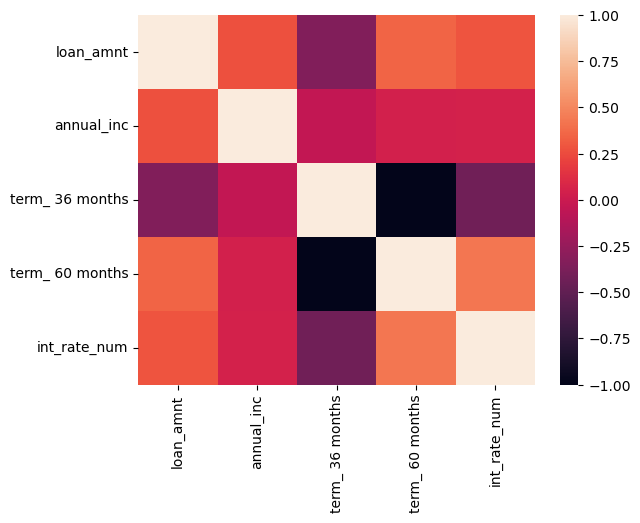

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data_4[x_cols_4].corr())


<AxesSubplot:>

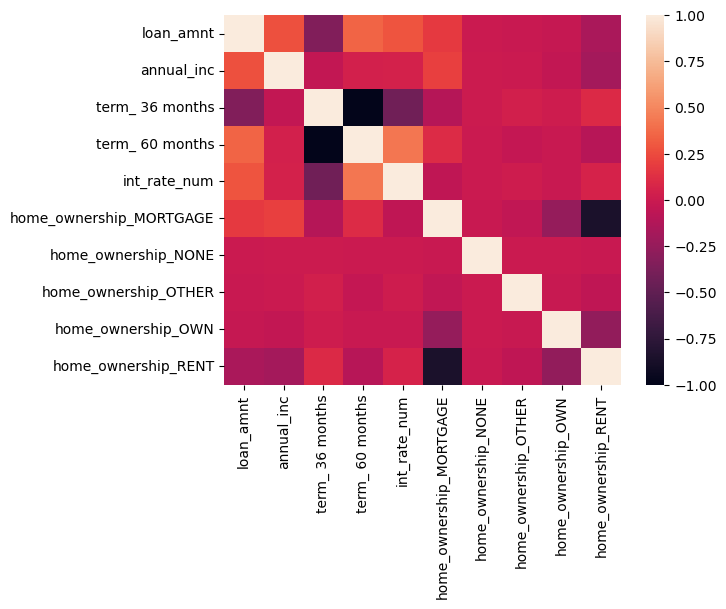

In [39]:
sns.heatmap(data_4[x_cols_3].corr())


In [40]:
clf_logistic = LogisticRegression(random_state=3).fit( tr_dat_x[x_cols_3], tr_dat_y )

val_pred_log = clf_logistic.predict( val_dat_x[x_cols_3] )

all_predictors_accuracy_log = accuracy_score( val_pred_log, val_dat_y )
all_predictors_accuracy_log

C:\Users\Tsenguunn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.841835489382475

In [41]:
clf_logistic_2 = LogisticRegression(random_state=3).fit( tr_dat_x[x_cols_4], tr_dat_y )

val_pred_log = clf_logistic_2.predict( val_dat_x[x_cols_4] )

all_predictors_accuracy_log = accuracy_score( val_pred_log, val_dat_y )
all_predictors_accuracy_log

C:\Users\Tsenguunn\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.841835489382475

In [42]:
x_cols_4

['loan_amnt',
 'annual_inc',
 'term_ 36 months',
 'term_ 60 months',
 'int_rate_num']

In [43]:
x_cols_5 = ['loan_amnt',
 'annual_inc',
 'int_rate_num']

In [44]:
data_4[ x_cols_4 ].median()

loan_amnt           9750.0000
annual_inc         60000.0000
term_ 36 months        1.0000
term_ 60 months        0.0000
int_rate_num           0.1199
dtype: float64

In [45]:
data_4.loc[ data_4['term_ 36 months']==1, x_cols_5 ].median()

loan_amnt        8000.0000
annual_inc      57000.0000
int_rate_num        0.1126
dtype: float64

In [46]:
data_4.loc[ data_4['term_ 60 months']==1, x_cols_5 ].median()

loan_amnt       14500.0000
annual_inc      63000.0000
int_rate_num        0.1491
dtype: float64

In [47]:
data_4.loc[ data_4['term_ 36 months']==1, x_cols_5 ].describe()

loan_amnt    annual_inc  int_rate_num
count  30695.000000  3.069500e+04  30695.000000
mean    9602.230005  6.810611e+04      0.112587
std     6324.871248  6.469632e+04      0.032697
min      500.000000  1.896000e+03      0.054200
25%     5000.000000  4.000000e+04      0.083800
50%     8000.000000  5.700000e+04      0.112600
75%    12300.000000  8.000400e+04      0.135700
max    35000.000000  6.000000e+06      0.232200

In [48]:
data_4.loc[ data_4['term_ 60 months']==1, x_cols_5 ].describe()

loan_amnt    annual_inc  int_rate_num
count  10275.000000  1.027500e+04  10275.000000
mean   15493.506083  7.440992e+04      0.148523
std     8412.322446  6.466566e+04      0.035331
min     1000.000000  4.800000e+03      0.057900
25%     9000.000000  4.500000e+04      0.119900
50%    14500.000000  6.300000e+04      0.149100
75%    20000.000000  8.850000e+04      0.174900
max    35000.000000  3.900000e+06      0.245900

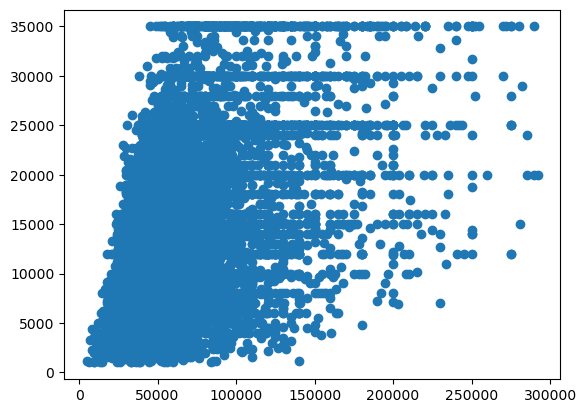

In [49]:
tmp_df = data_4.loc[ ( data_4['term_ 60 months']==1 ) &  ( data_4['annual_inc'] < 300000 ), : ]

plt.scatter( tmp_df['annual_inc' ], tmp_df['loan_amnt' ] )

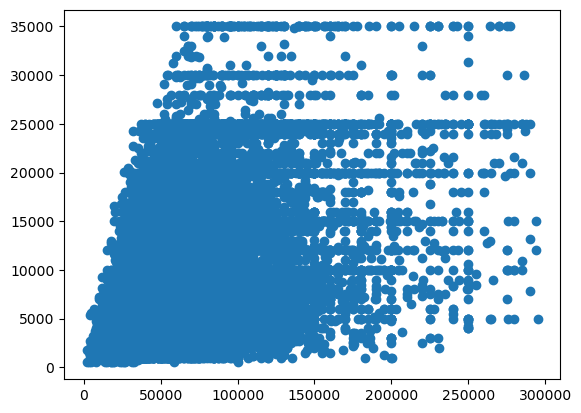

In [50]:
tmp_df = data_4.loc[ ( data_4['term_ 60 months']==0 ) &  ( data_4['annual_inc'] < 300000 ), : ]

plt.scatter( tmp_df['annual_inc' ], tmp_df['loan_amnt' ] )

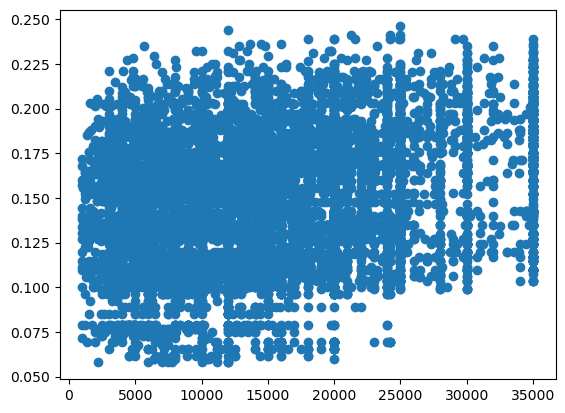

In [51]:
tmp_df = data_4.loc[ ( data_4['term_ 60 months']==1 ) &  ( data_4['annual_inc'] < 300000 ), : ]

plt.scatter( tmp_df['loan_amnt' ], tmp_df['int_rate_num' ] )

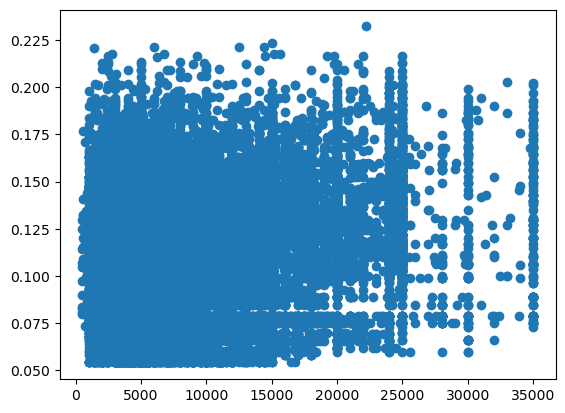

In [52]:
tmp_df = data_4.loc[ ( data_4['term_ 60 months']==0 ) &  ( data_4['annual_inc'] < 300000 ), : ]

plt.scatter( tmp_df['loan_amnt' ], tmp_df['int_rate_num' ] )

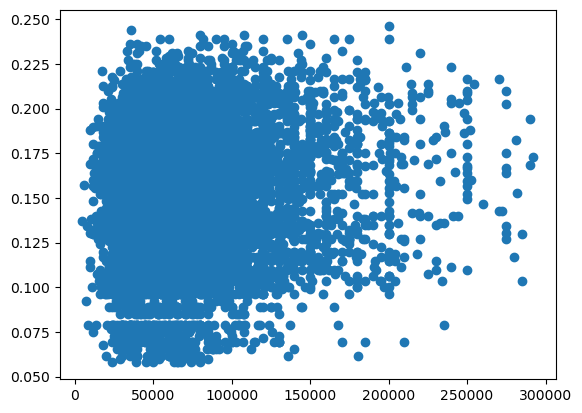

In [53]:
tmp_df = data_4.loc[ ( data_4['term_ 60 months']==1 ) &  ( data_4['annual_inc'] < 300000 ), : ]

plt.scatter( tmp_df['annual_inc' ], tmp_df['int_rate_num' ] )

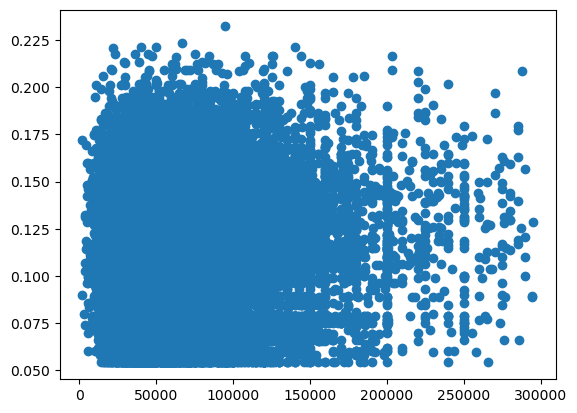

In [54]:
tmp_df = data_4.loc[ ( data_4['term_ 60 months']==0 ) &  ( data_4['annual_inc'] < 300000 ), : ]

plt.scatter( tmp_df['annual_inc' ], tmp_df['int_rate_num' ] )

In [55]:
data_4.loc[ data_4['defaulted']==1, x_cols_4 ].describe()

loan_amnt    annual_inc  term_ 36 months  term_ 60 months  \
count   6171.000000  6.171000e+03      6171.000000      6171.000000   
mean   11949.084427  6.417099e+04         0.601361         0.398639   
std     7963.639346  5.007956e+04         0.489658         0.489658   
min      500.000000  2.000000e+03         0.000000         0.000000   
25%     5600.000000  3.800000e+04         0.000000         0.000000   
50%    10000.000000  5.400000e+04         1.000000         0.000000   
75%    16000.000000  7.500000e+04         1.000000         1.000000   
max    35000.000000  1.250000e+06         1.000000         1.000000   

       int_rate_num  
count   6171.000000  
mean       0.139784  
std        0.035409  
min        0.054200  
25%        0.114900  
50%        0.138700  
75%        0.164500  
max        0.244000

In [56]:
data_4.loc[ data_4['defaulted']==0, x_cols_4 ].describe()

loan_amnt    annual_inc  term_ 36 months  term_ 60 months  \
count  34799.000000  3.479900e+04     34799.000000     34799.000000   
mean   10925.556050  7.066524e+04         0.775425         0.224575   
std     7242.591802  6.696524e+04         0.417308         0.417308   
min      500.000000  1.896000e+03         0.000000         0.000000   
25%     5200.000000  4.200000e+04         1.000000         0.000000   
50%     9600.000000  6.000000e+04         1.000000         0.000000   
75%    15000.000000  8.499600e+04         1.000000         0.000000   
max    35000.000000  6.000000e+06         1.000000         1.000000   

       int_rate_num  
count  34799.000000  
mean       0.118374  
std        0.036137  
min        0.054200  
25%        0.089000  
50%        0.117100  
75%        0.142700  
max        0.245900

In [57]:
data_4[ x_cols_4 ].describe()

loan_amnt    annual_inc  term_ 36 months  term_ 60 months  \
count  40970.000000  4.097000e+04     40970.000000     40970.000000   
mean   11079.722358  6.968706e+04         0.749207         0.250793   
std     7364.722983  6.474553e+04         0.433475         0.433475   
min      500.000000  1.896000e+03         0.000000         0.000000   
25%     5300.000000  4.100000e+04         0.000000         0.000000   
50%     9750.000000  6.000000e+04         1.000000         0.000000   
75%    15000.000000  8.300400e+04         1.000000         1.000000   
max    35000.000000  6.000000e+06         1.000000         1.000000   

       int_rate_num  
count  40970.000000  
mean       0.121599  
std        0.036833  
min        0.054200  
25%        0.096300  
50%        0.119900  
75%        0.147200  
max        0.245900

In [58]:
x_cols_4

['loan_amnt',
 'annual_inc',
 'term_ 36 months',
 'term_ 60 months',
 'int_rate_num']

In [59]:
temp_row = [ 9750.000000, 6.000000e+04, 0, 1, 0.119900 ]
income_grid = [10000 * i for i in range(2, 11)]

income_def_prob_list = []
for income in income_grid:
    temp_row = [ 9750.000000, income, 0, 1, 0.119900 ]
    income_def_prob_list.append( clf_logistic_2.predict_proba( np.array( temp_row ).reshape( 1, -1 ) )[0][1] )

income_def_prob_list

C:\Users\Tsenguunn\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Tsenguunn\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Tsenguunn\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Tsenguunn\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Tsenguunn\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Tsenguunn\anaconda3\lib\site-packages\sklearn\base.

[0.3889489941030213,
 0.32849615721739744,
 0.2732377744175403,
 0.22417163072649685,
 0.18171342798185855,
 0.14578573144989984,
 0.11595492742702308,
 0.09157376502331076,
 0.0719021337404306]

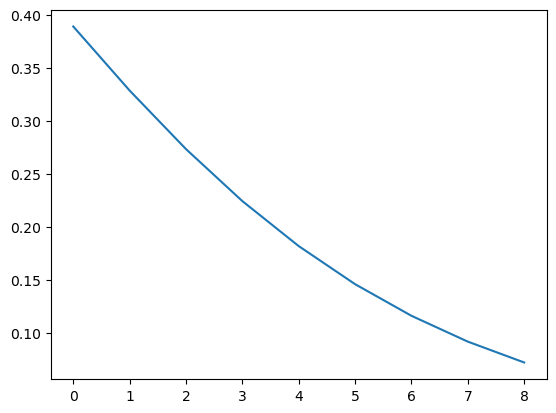

In [60]:
plt.plot( income_def_prob_list )

C:\Users\Tsenguunn\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Tsenguunn\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Tsenguunn\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Tsenguunn\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Tsenguunn\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Tsenguunn\anaconda3\lib\site-packages\sklearn\base.

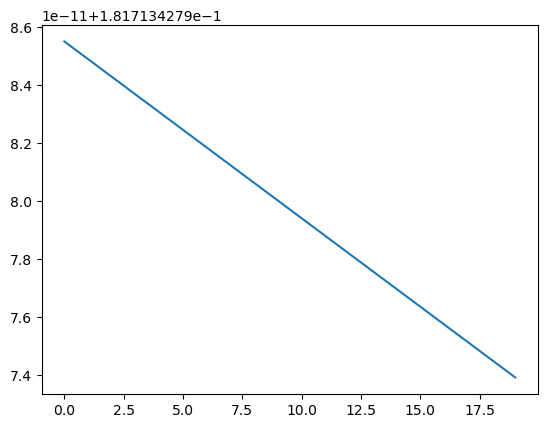

In [61]:
temp_row = [ 9750.000000, 6.000000e+04, 1, 0, 0.119900 ]
int_rate_grid = [0.01 * i for i in range(6, 26)]

int_rate_def_prob_list = []
for int_rate in int_rate_grid:
    temp_row = [ 9750.000000, 6.000000e+04, 0, 1, int_rate ]
    int_rate_def_prob_list.append( clf_logistic_2.predict_proba( np.array( temp_row ).reshape( 1, -1 ) )[0][1] )

plt.plot( int_rate_def_prob_list )

In [62]:
int_rate_def_prob_list

[0.18171342798550988,
 0.1817134279849003,
 0.18171342798429074,
 0.1817134279836812,
 0.1817134279830716,
 0.18171342798246207,
 0.18171342798185247,
 0.1817134279812429,
 0.1817134279806333,
 0.18171342798002377,
 0.18171342797941417,
 0.18171342797880463,
 0.18171342797819506,
 0.1817134279775855,
 0.18171342797697593,
 0.18171342797636636,
 0.1817134279757568,
 0.1817134279751472,
 0.18171342797453763,
 0.18171342797392806]

C:\Users\Tsenguunn\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Tsenguunn\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Tsenguunn\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Tsenguunn\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Tsenguunn\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Tsenguunn\anaconda3\lib\site-packages\sklearn\base.

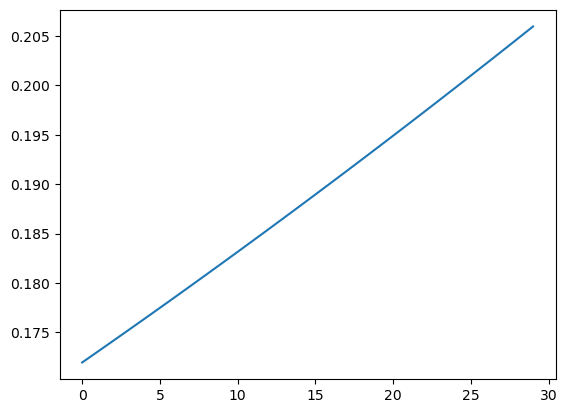

In [63]:
temp_row = [ 9750.000000, 6.000000e+04, 1, 0, 0.119900 ]
loan_amnt_grid = [1000 * i for i in range(1, 31)]

loan_amnt_def_prob_list = []
for loan_amnt in loan_amnt_grid:
    temp_row = [ loan_amnt, 6.000000e+04, 1, 0, 0.119900 ]
    loan_amnt_def_prob_list.append( clf_logistic_2.predict_proba( np.array( temp_row ).reshape( 1, -1 ) )[0][1] )

plt.plot( loan_amnt_def_prob_list )

In [64]:
loan_amnt_def_prob_list

[0.17194523508634302,
 0.1730401869599775,
 0.1741406451551909,
 0.17524661868965086,
 0.1763581163454704,
 0.17747514666602568,
 0.17859771795277143,
 0.17972583826205404,
 0.18085951540192247,
 0.18199875692893897,
 0.1831435701449885,
 0.18429396209408924,
 0.18544993955920328,
 0.1866115090590492,
 0.18777867684491706,
 0.1889514488974858,
 0.1901298309236451,
 0.1913138283533204,
 0.19250344633630428,
 0.19369868973909263,
 0.1948995631417276,
 0.19610607083464812,
 0.19731821681554793,
 0.1985360047862428,
 0.19975943814954708,
 0.20098852000616024,
 0.20222325315156547,
 0.20346364007293888,
 0.20470968294607259,
 0.20596138363231054]

In [68]:
import shap

In [99]:
 val_dat_x[x_cols_4 ].median()

loan_amnt           8175.0000
annual_inc         56004.0000
term_ 36 months        1.0000
term_ 60 months        0.0000
int_rate_num           0.1249
dtype: float64

In [142]:
# compute SHAP values
#explainer = shap.Explainer(model, val_dat_x[ x_cols_4 ])
#explainer = shap.Explainer(model, val_dat_x[x_cols_4 ].iloc[0:1, :] )
#explainer = shap.Explainer(model, np.array( [8175.0000, 56004.0000, 1.0000, 0.0000, 0.1249] ).reshape(1, -1) )
explainer = shap.Explainer(clf_logistic_2, np.array( [8175.0000, 56004.0000, 1.0000, 0.0000, 0.1249] ).reshape(1, -1) )

shap_values = explainer( val_dat_x[ x_cols_4 ].iloc[0:1, :] )

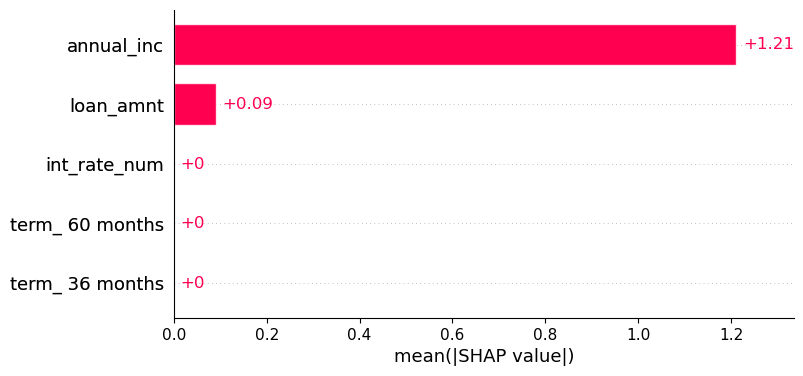

In [143]:
shap.plots.bar(shap_values)

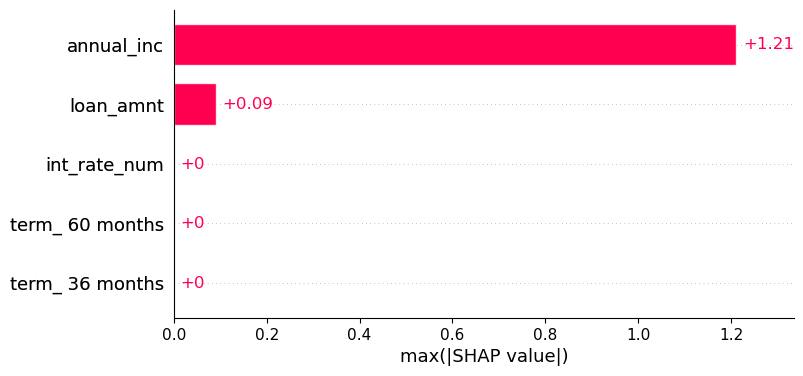

In [144]:
shap.plots.bar(shap_values.abs.max(0))

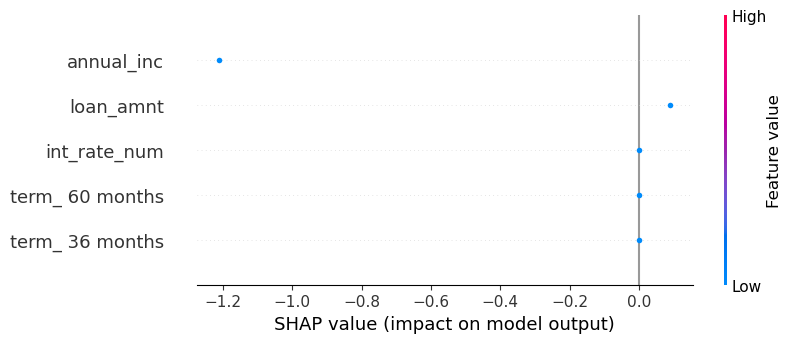

In [145]:
shap.plots.beeswarm(shap_values)

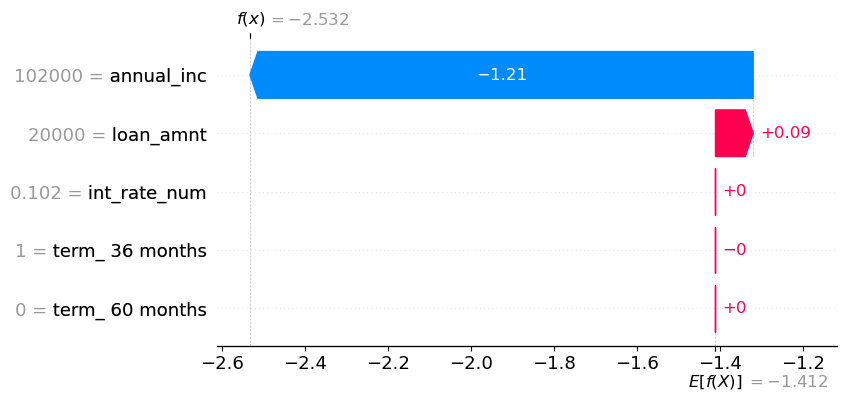

In [146]:
shap.plots.waterfall( shap_values[0,:] )

In [147]:
shap_values

.values =
array([[ 9.07099280e-02, -1.21090163e+00, -0.00000000e+00,
         0.00000000e+00,  9.18287826e-12]])

.base_values =
array([-1.41166398])

.data =
array([[2.000e+04, 1.020e+05, 1.000e+00, 0.000e+00, 1.025e-01]])

In [148]:
val_dat_x[ x_cols_4 ].iloc[0:1, :]

loan_amnt  annual_inc  term_ 36 months  term_ 60 months  int_rate_num
29664    20000.0    102000.0              1.0              0.0        0.1025

In [149]:
np.sum( shap_values.values )

-1.1201917064849152

In [150]:
model.predict_proba( np.array( [8175.0000, 56004.0000, 1.0000, 0.0000, 0.1249] ).reshape(1, -1) )

array([[0.66849947, 0.33150056]], dtype=float32)

In [151]:
model.predict_proba( val_dat_x[ x_cols_4 ].iloc[0:1, :] )

array([[0.6948348 , 0.30516514]], dtype=float32)